In [1]:
# Homework 1: AM205

# Part 1a: Polynomial approximation of the gamma function
import math as math
import numpy as np
import scipy as scipy 
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import scipy.special as scp


n: int = 6 # interval value
x: np.ndarray = np.linspace(1,n,n) # Need to fill in the correct dimensions
y: np.ndarray = np.array([1,1,2,6,24,120]) # figure out the polynomial, this are the data points

# Solve the Vandermonde
V: np.ndarray = np.vander(x) # creating the Vandermode matrix
b: np.ndarray = np.linalg.solve(V,y) #type : then giving a type hint to python
cond_num = np.linalg.cond(V)  #get the condition number of Vandermonde

# Answer for 1a:
print("Coefficient matrix b: starting at g5")
print(b)


Coefficient matrix b: starting at g5
[  0.36666667  -5.125       27.75       -70.875       83.88333333
 -35.        ]


In [22]:
# Problem 1b: Construct second approx
h_y = np.array([math.log(1),math.log(1),math.log(2),math.log(6),math.log(24),math.log(120)]) #take log of each point
h_b = np.linalg.solve(V,h_y) #new b or outputs
flip_hb = h_b[::-1]
print(f"The coefficients of hx {flip_hb}")


The coefficients of gx [ 1.26738281e+00 -2.18745539e+00  1.10075232e+00 -2.01368564e-01
  2.16609418e-02 -9.72121019e-04]


The coefficients of gx are [ 1.26738281e+00 -2.18745539e+00  1.10075232e+00 -2.01368564e-01
  2.16609418e-02 -9.72121019e-04]


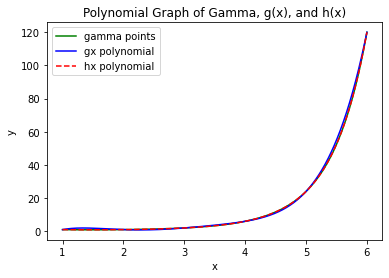

In [21]:
# Problem 1c: Trying to approx the polynomial function gx 

x: np.ndarray = np.linspace(1,6,1000)
n = np.array([1,2,3,4,5,6])

gamma = scp.gamma(x) # to create the gamma function using the values of x

def g(x: np.ndarray) -> np.ndarray: #creating a function to define gx
    gx = np.polyval(b,x)
    return gx
gx = g(x)

flip_b = h_b[::-1]  #flip the coefficients so they are going 0 --> n 
#print(f"The coefficients of gx are {flip_b}")

# Creating the hx exponential function on our coefficients
def h(x):
    for i in x:
        return np.exp(np.sum(np.array([flip_b[i]*x**i for i in range(np.shape(n)[0])]), axis = 0))
hx = h(x)  


#Plot figures to confirm that the function runs through points: 1 through 6
plt.figure()
plt.title('Polynomial Graph of Gamma, g(x), and h(x)')
plt.plot(x,gamma,'g-', label='gamma points')
plt.plot(x,gx, 'b-', label='gx polynomial') # run x, gx so that it starts at the correct index
plt.plot(x,hx,'r--', label = 'hx polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
# 1d: Calculate maximum relative error between (gamma and gx) and (gamma and hx)
# need to create a while loop to show

relative_error1 = max(abs((gamma-gx)/gamma))
print(f"Value of the relative error between gamma and gx is {relative_error1}")
                      
relative_error2 = max(abs((gamma-hx)/gamma))
print(f"Value of the relative error between gamma and hx is {relative_error2}")



Value of the first relative error between gamma and gx is 1.2108377263976573
Value of the relative error between gamma and hx is 0.008021143746632866


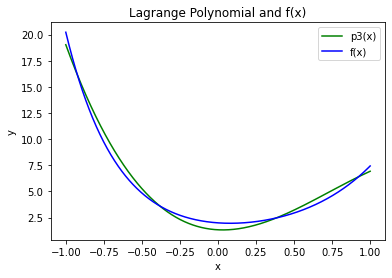

In [12]:
# 2a : Error bounds with Lagrange polynomials
n = 4  # number of points
x = np.linspace(-1,1,1000)

def f(x):
    return math.exp(-3*x)+math.exp(2*x)  #fx function given

#Used this from Prof Rycroft's example ch_intery.py
def lagr(x,xp,yp):  #this defines the Lagrange(position you want to evaluate, sequence of points in two vectors xp,yp)
    lm=0
    for k in range(xp.size):
        xc=xp[k]
        li=1
        for l in range(xp.size):
            if l!=k:
                li*=(x-xp[l])/(xp[k]-xp[l])
        lm+=yp[k]*li
    return lm


xp = np.array([math.cos((2*j+1)*math.pi/(2*n)) for j in range(n)]) # (Chebyshev points) should be better
# the function fx using the chevyshev to feed into lagrange
yp = np.array([f(q) for q in xp])

# Want to smooth out the function over 1000 points rather than 4
lag = np.array([lagr(q,xp,yp) for q in x ])
yp2 =np.array([f(q) for q in x])



#Plot Lagrange Polynomials 
plt.figure()
plt.title('Lagrange Polynomial and f(x)')
plt.plot(x,lag,'g-', label='p3(x)')
plt.plot(x,yp2,'b-', label='f(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [13]:
#2b find infinity norm
residual = yp2-lag  # fx - px
infinity_norm = max(abs(residual))
print(f"The value of the infinity_norm is {infinity_norm}")

The value of the infinity_norm is 1.1924886347866277


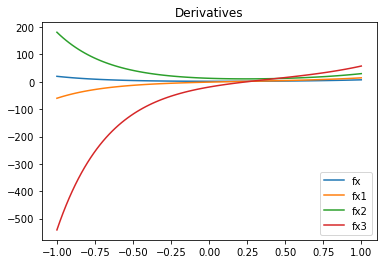

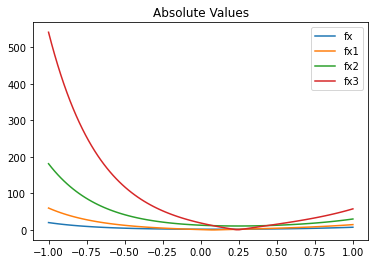

In [14]:
# plot 2c 
x = np.linspace(-1,1,100)

def f(x):
    return math.exp(-3*x)+math.exp(2*x)
#creating fx across 1000 points within the interval
fx =np.array([f(q) for q in x])

# New function to describe the derivate of fx
def f(x,n):
    return (-3)**n*math.exp(-3*x)+2**n*math.exp(2*x)

fx1 = np.array([f(q,1) for q in x]) #first derivative
fx2 = np.array([f(q,2) for q in x]) # second " "
fx3 = np.array([f(q,3) for q in x]) # third " "

afx = abs(fx)
afx1 = abs(fx1) # absolute value of first derivative
afx2 = abs(fx2) # absolute value of second derivative
afx3 = abs(fx3) # absolute value of third derivative

plt.figure()
plt.title('Derivatives')
plt.plot(x,fx, label = 'fx')
plt.plot(x,fx1, label = 'fx1')
plt.plot(x,fx2, label = 'fx2')
plt.plot(x,fx3, label = 'fx3')
plt.legend()

plt.figure()
plt.title('Absolute Values')
plt.plot(x,afx, label = 'fx')
plt.plot(x,afx1, label = 'fx1')
plt.plot(x,afx2, label = 'fx2')
plt.plot(x,afx3, label = 'fx3')
plt.legend()




error of the old polynomial is 1.1924886347866277
The coefficients of the lagrange cubic polynomial is [ 1.33698036 -0.72293116 11.64342945 -5.3250426 ]
error of the new polynomial is 1.1654197926685796


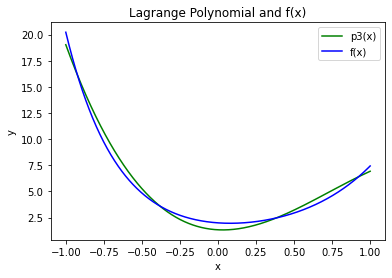

In [19]:
# 2d Find a cubic polynomial that is smaller

n = 4  # number of points
x = np.linspace(-1,1,1000)

def f(x):
    return math.exp(-3*x)+math.exp(2*x)

def lagr(x,xp,yp):  #this defines the Lagrange(position you want to evaluate, sequence of points in two vectors xp,yp)
    lm=0
    for k in range(xp.size):
        xc=xp[k]
        li=1
        for l in range(xp.size):
            if l!=k:
                li*=(x-xp[l])/(xp[k]-xp[l])
        lm+=yp[k]*li
    return lm

xp =np.array([math.cos((2*j+1)*math.pi/(2*n)) for j in range(n)]) # (Chebyshev points) should be better
yp =np.array([f(q) for q in xp]) # to use for our lagrange formula

lag = np.array([lagr(q,xp,yp) for q in x]) #lagrange function
yp2 =np.array([f(q) for q in x])  #finding the actual function for 1000 points
 
#need to find the error using the max inf error 
residual = max(abs(yp2-lag))


#find new coefficients by creating a polynomial similar to the lagrange
old_poly = np.polyfit(x,lag,3)
old_poly1 = old_poly[::-1]
print(f"error of the old polynomial is {residual}")
print(f"The coefficients of the lagrange cubic polynomial is {old_poly1}")

#test out new polynomial which is based off of the lagrange but with manipulated coefficients to reduce the error
def pt(x):
    return old_poly1[0] - 0.75*x+old_poly1[2]*x**2+x**3*old_poly1[3]
ptx = np.array([pt(q) for q in x])

# Calculate the new residual
new_residual = max(abs(yp2-ptx))
print(f"error of the new polynomial is {new_residual}")

#Plot Lagrange Polynomials 
plt.figure()
plt.title('Lagrange Polynomial and f(x)')
plt.plot(x,lag,'g-', label='p3(x)')
plt.plot(x,yp2,'b-', label='f(x)')
#plt.plot(x,ptx,'-', label='residual')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()




In [2]:
# Problem 4a
from scipy.interpolate import CubicSpline

# referenced: https://stackoverflow.com/questions/31543775/how-to-perform-cubic-spline-interpolation-in-python

# calculate 5 natural cubic spline polynomials for 6 points
# (x,y) = (0,0) (1,1) (2,0) (3,-1) 
t = np.array([0, 1, 2, 3, 4])  
x = np.array([0, 1, 0, -1, 0])

# calculate natural cubic spline polynomials
cs = CubicSpline(t,x,bc_type='periodic')

#print(cs.c)

# Polynomial coefficients for 0 <= t <= 1
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 1 < t <= 2
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# Polynomial coefficients for 2 < t <= 3
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Polynomial coefficients for 4 < t <= 5
a3 = cs.c.item(3,3)
b3 = cs.c.item(2,3)
c3 = cs.c.item(1,3)
d3 = cs.c.item(0,3)

# Print polynomial equations for different x regions
print('S1(0<=t<=1) = ', a0, ' + ', b0, '(t0) + ', c0, '(t0)^2  + ', d0, '(t0)^3')
print('S2(1< t<=2) = ', a1, ' + ', b1, '(t1) + ', c1, '(t1)^2  + ', d1, '(t1)^3')
print('S3(1< t<=3) = ', a2, ' + ', b2, '(t2) + ', c2, '(t2)^2  + ', d2, '(t2)^3')
print('S4(3< t<=4) = ', a3, ' + ', b3, '(t3) + ', c3, '(t3)^2  + ', d3, '(t3)^3')




S1(0<=t<=1) =  0.0  +  1.5 (t0) +  0.0 (t0)^2  +  -0.5 (t0)^3
S2(1< t<=2) =  1.0  +  -6.846375318521799e-17 (t1) +  -1.5 (t1)^2  +  0.5000000000000002 (t1)^3
S3(1< t<=3) =  0.0  +  -1.4999999999999998 (t2) +  -4.440892098500626e-16 (t2)^2  +  0.5000000000000002 (t2)^3
S4(3< t<=4) =  -1.0  +  -6.476300976980079e-17 (t3) +  1.5 (t3)^2  +  -0.5 (t3)^3


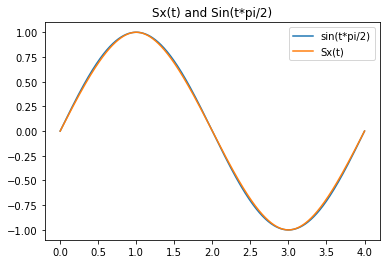

In [3]:
#4b Plot sxt and sin(tpi/2)
from scipy.interpolate import CubicSpline

t = np.array([0, 1, 2, 3, 4])  
x = np.array([0, 1, 0, -1, 0])

cs = CubicSpline(t,x,bc_type= 'periodic')
t_pts = np.linspace(0,4,1000) #going from 0 - 4 with 1000 points

sin_t = np.sin(t_pts*np.pi/2)
sxt = cs(t_pts)

plt.plot()
plt.title('Sx(t) and Sin(t*pi/2)')
plt.plot(t_pts,sin_t, label = 'sin(t*pi/2)')
plt.plot(t_pts,sxt, label = 'Sx(t)')
plt.legend()

Sy1(0<=t<=1) =  1.0  +  1.1102230246251565e-16 (t-0) +  -1.5 (t-0)^2  +  0.5 (t-0)^3
Sy2(1< t<=2) =  0.0  +  -1.5000000000000002 (t-1) +  2.220446049250313e-16 (t-1)^2  +  0.5 (t-1)^3
Sy3(2< t<=3) =  -1.0  +  1.1102230246251565e-16 (t-2) +  1.5 (t-2)^2  +  -0.5 (t-2)^3
Sy4(3< t<=4) =  0.0  +  1.4999999999999998 (t-3) +  2.220446049250313e-16 (t-3)^2  +  -0.5 (t-3)^3


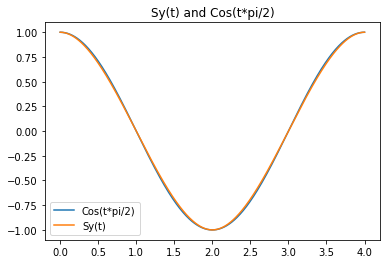

In [4]:
# 4c Construct a second cubic spline sy(t)
import numpy as np
from scipy.interpolate import CubicSpline

# referenced: https://stackoverflow.com/questions/31543775/how-to-perform-cubic-spline-interpolation-in-python

# calculate 5 natural cubic spline polynomials for 6 points
# (x,y) = (0,0) (1,1) (2,0) (3,-1) 
t = np.array([0, 1, 2, 3, 4])  
y = np.array([1, 0, -1, 0, 1])

# calculate natural cubic spline polynomials
cs = CubicSpline(t,y,bc_type='periodic')

## Aditional - find polynomial coefficients for different x regions

# if you want to print polynomial coefficients in form
# S0(0<=x<=1) = a0 + b0(x-x0) + c0(x-x0)^2 + d0(x-x0)^3
# S1(1< x<=2) = a1 + b1(x-x1) + c1(x-x1)^2 + d1(x-x1)^3
# ...
# S4(4< x<=5) = a4 + b4(x-x4) + c5(x-x4)^2 + d5(x-x4)^3
# x0 = 0; x1 = 1; x4 = 4; (start of x region interval)

# show values of a0, b0, c0, d0, a1, b1, c1, d1 ...
#print(cs.c)

# Polynomial coefficients for 0 <= x <= 1
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 1 < x <= 2
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# Polynomial coefficients for 2 < x <= 3
a2 = cs.c.item(3,2)
b2 = cs.c.item(2,2)
c2 = cs.c.item(1,2)
d2 = cs.c.item(0,2)

# Polynomial coefficients for 4 < x <= 5
a3 = cs.c.item(3,3)
b3 = cs.c.item(2,3)
c3 = cs.c.item(1,3)
d3 = cs.c.item(0,3)

# Print polynomial equations for different x regions
print('Sy1(0<=t<=1) = ', a0, ' + ', b0, '(t-0) + ', c0, '(t-0)^2  + ', d0, '(t-0)^3')
print('Sy2(1< t<=2) = ', a1, ' + ', b1, '(t-1) + ', c1, '(t-1)^2  + ', d1, '(t-1)^3')
print('Sy3(2< t<=3) = ', a2, ' + ', b2, '(t-2) + ', c2, '(t-2)^2  + ', d2, '(t-2)^3')
print('Sy4(3< t<=4) = ', a3, ' + ', b3, '(t-3) + ', c3, '(t-3)^2  + ', d3, '(t-3)^3')

cs = CubicSpline(t,y,bc_type= 'periodic')
t_pts = np.linspace(0,4,1000) #going from 0 - 4 with 1000 points

cos_t = np.cos(t_pts*np.pi/2)
syt = cs(t_pts)


plt.title('Sy(t) and Cos(t*pi/2)')
plt.plot(t_pts,cos_t, label = 'Cos(t*pi/2)')
plt.plot(t_pts,syt,label = 'Sy(t)')
plt.legend()



3.0499999712640764 is the area from our integration
3.141592653589793 is the value of pi


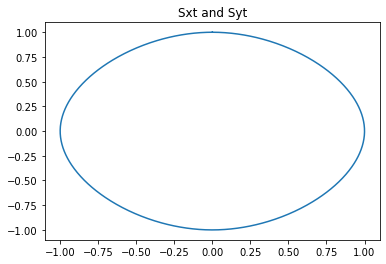

In [5]:
# 4d Plot
from scipy.integrate import simps

plt.title('Sxt and Syt')
plt.plot(sxt,syt)

#2d Find the area 
Area = scipy.integrate.simps(syt,sxt)
print("{} is the area from our integration".format(Area))
print("{} is the value of pi".format(np.pi))



300 by 400 pixels


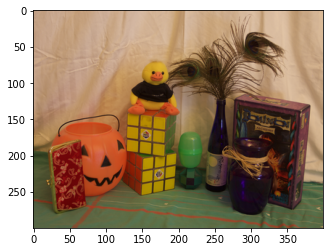

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Here is Fb [[ 0.60008372 -0.83676669 -2.30778801]
 [-0.35171075  0.04388672 -1.50469715]
 [-0.38399305 -0.43968442  1.00330556]]
Here is Fc [[ 1.98194378  0.93751476 -1.49131774]
 [ 1.20186615  2.04424222 -2.0169704 ]
 [ 0.86871427 -0.27394525 -0.67605163]]
Here is Fd [[-0.31465748  0.18149806  0.32879883]
 [-0.47451353  0.55429676  0.30397059]
 [-0.13004278  0.4885107   1.02908663]]
Here are our intercepts (rgb) [[ 0.06216703]
 [ 0.04630345]
 [-0.00627709]]
Here is my S: 0.004049487125702646


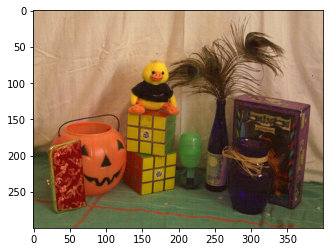

In [80]:
# Problem 5a: 
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load in the test image 
regular=io.imread("am205_hw1_files/problem5/objects/400x300/regular.png",as_gray=False)/255

# Load in the images to based the red, green, blue vectors
green=io.imread("am205_hw1_files/problem5/objects/400x300/low1.png",as_gray=False)/255
blue=io.imread("am205_hw1_files/problem5/objects/400x300/low2.png",as_gray=False)/255
red=io.imread("am205_hw1_files/problem5/objects/400x300/low3.png",as_gray=False)/255

# Check size
(x,y,z)= regular.shape
print(x,"by",y,"pixels")

# Plot the image
plt.imshow(regular)
plt.show()

red_reg = regular[:,:,0] # all read pixels
red_reg_rs = red_reg.reshape(-1,1) #changing to 120,000 by 1 matrix
green_reg = regular[:,:,1]
green_reg_rs = green_reg.reshape(-1,1)
blue_reg = regular[:,:,2]
blue_reg_rs = blue_reg.reshape(-1,1)


# Taking our extra images  and reshaping them to 120,000 by 3 (RGB) 
# This takes each pixel and opens them up to get a 120,000 by 9 matrix
red_reshape = red.reshape(300*400,3)
green_reshape = green.reshape(300*400,3)
blue_reshape = blue.reshape(300*400,3)


X = np.concatenate((red_reshape, green_reshape, blue_reshape),axis = 1) # places columns next to each other


# now doing the linear regression
#Comparing our large matrix vs our red channel result from the regular image
red_linreg = LinearRegression().fit(X, red_reg_rs)
green_linreg = LinearRegression().fit(X, green_reg_rs)
blue_linreg = LinearRegression().fit(X, blue_reg_rs)
#print(red_reshape.shape) (120,000, 3)

#Reshape
red_mat = red_linreg.coef_.reshape(3,3)
green_mat = green_linreg.coef_.reshape(3,3)
blue_mat = blue_linreg.coef_.reshape(3,3)



Fb = np.array([red_mat[0,:], green_mat[0,:], blue_mat[0,:]])
Fc = np.array([red_mat[1,:], green_mat[1,:], blue_mat[1,:]])
Fd = np.array([red_mat[2,:], green_mat[2,:], blue_mat[2,:]])


print(f"Here is Fb {Fb}")

print(f"Here is Fc {Fc}")
#print(green_linreg.intercept_)

print(f"Here is Fd {Fd}")
#print(blue_linreg.intercept_)

pconst = np.array([red_linreg.intercept_, green_linreg.intercept_, blue_linreg.intercept_]) # put all intercepts together
print(f"Here are our intercepts (rgb) {pconst}")

#Now predicting based our previous model
red_predict = red_linreg.predict(X)
green_predict = green_linreg.predict(X)
blue_predict = blue_linreg.predict(X)



#Replacing the pixels on top of each other 
predict_image = np.concatenate((red_predict, green_predict, blue_predict), axis = 1).reshape(300,400,3)

from numpy.linalg import norm as norm
sum_err = norm(regular-predict_image)
S = ((sum_err)**2)/(400*300)
print(f"Here is my S: {S}")

# Plot the image
plt.imshow(predict_image)
plt.show()


300 by 400 pixels


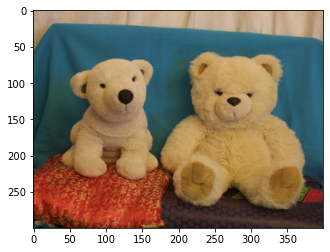

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


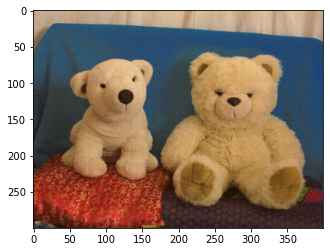

Here is the mse value T = 0.0054001910455744925


In [73]:
# 5b
from sklearn.metrics import mean_squared_error

# Load in the test image 
regular2 = io.imread("am205_hw1_files/problem5/bears/400x300/regular.png",as_gray=False)/255

# Load in the three images to use as the bases
green2 = io.imread("am205_hw1_files/problem5/bears/400x300/low1.png",as_gray=False)/255
blue2 = io.imread("am205_hw1_files/problem5/bears/400x300/low2.png",as_gray=False)/255
red2 = io.imread("am205_hw1_files/problem5/bears/400x300/low3.png",as_gray=False)/255

# Check size
(x,y,z)= regular.shape
print(x,"by",y,"pixels")

# Plot the image
plt.imshow(regular2)
plt.show()

#Reshaping the regular channels
red_reg2 = regular2[:,:,0] # all red pixels
red_reg_rs2 = red_reg2.reshape(-1,1) #changing this to a 120,000 by 1 matrix

green_reg2 = regular2[:,:,1] 
green_reg_rs2 = green_reg2.reshape(-1,1)

blue_reg2 = regular2[:,:,2]
blue_reg_rs2 = blue_reg2.reshape(-1,1)



# now reshaping each of the image input 
red_reshape2 = red2.reshape(300*400,3) # changing the 3x3 matrix to be a 120,000 by 3 long matrix
green_reshape2 = green2.reshape(300*400,3)
blue_reshape2 = blue2.reshape(300*400,3)

X2 = np.concatenate((red_reshape2, green_reshape2, blue_reshape2),axis = 1) # places columns next to each other


#Now predicting based our previous model found in 5a
red_predict2 = red_linreg.predict(X2) #predicting our red channel based our initial model
green_predict2 = green_linreg.predict(X2)
blue_predict2 = blue_linreg.predict(X2)


#Replacing the pixels on top of each other 
predict_image_bears = np.concatenate((red_predict2, green_predict2, blue_predict2), axis = 1).reshape(300,400,3)

# Plot the image
plt.imshow(predict_image_bears)
plt.show()

from numpy.linalg import norm as norm


# Now take the error of the regular image and the predicted image
sum_err = norm(regular2-predict_image_bears)

MSE = ((sum_err)**2)/(400*300)
print(f"Here is the mse value T = {MSE}")